<a href="https://colab.research.google.com/github/saha-trideep/Gastronomical-Insights-Analyzing-Zomato-Restaurant-Data-Clustering-Patterns-and-Predicting-Costs/blob/main/Zomato_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Sentiment Analysis**

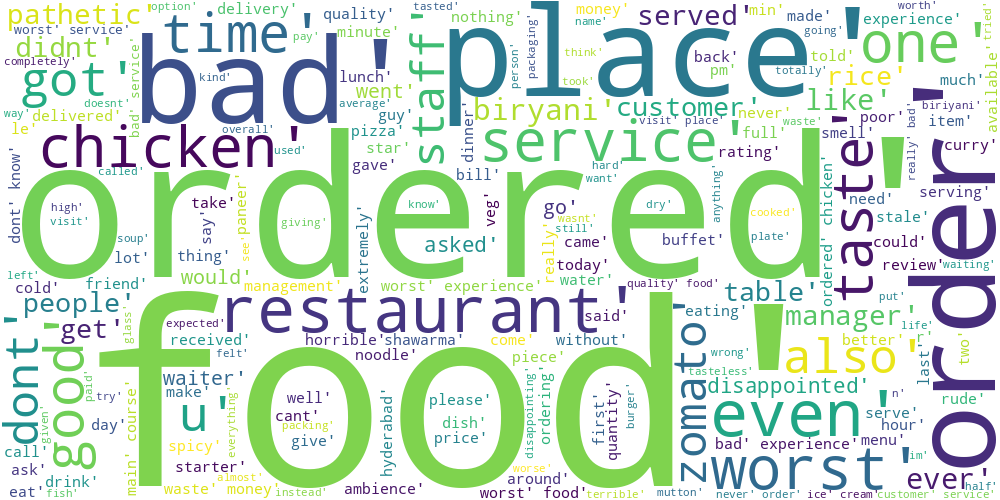

##### **Project Type**    - EDA/Regression/Unsupervised
##### **Contribution**    - Trideep Saha

##**Project Summary**

---

**Sentiment Analysis on Zomato Restaurant Reviews**

This data science project focused on analyzing sentiment in Zomato restaurant reviews, employing a multifaceted approach encompassing natural language processing (NLP) techniques and machine learning. The project unfolded in several key stages:




* **Sentiment Analysis Pipeline**:

  Cleaned and preprocessed text data using NLP techniques, including lemmatization and tokenization.
  Utilized NLTK VADER for sentiment intensity analysis, producing compound scores indicating overall sentiment.


*  **Insights and Visualizations**:

  Derived insights into sentiment distribution across clusters, ratings, and cuisines.
  Created visualizations, including bar plots and sentiment distribution charts, to communicate findings effectively.


*  **Hypothesis Testing**:

  Formulated and tested hypotheses related to sentiment patterns, clusters, and review characteristics.
  Utilized statistical tests such as Pearson correlation and t-tests to draw conclusions.


*  **Machine Learning Integration**:

  Integrated machine learning models, specifically Random Forest Regression, to predict sentiment scores based on selected features.
  Evaluated models using metrics such as Mean Squared Error (MSE) and R-squared for performance assessment.


*  **Key Findings**:

  Identified influential features impacting sentiment scores.
  Explored sentiment variations across different clusters and cuisines.
  Investigated correlations between sentiment and review characteristics.


---
**Conclusion**:



*   Demonstrated the efficacy of combining rule-based sentiment analysis (NLTK VADER) with machine learning models.

*   Provided actionable insights for stakeholders in the restaurant industry based on sentiment patterns in reviews.





# ***Let's Begin !***

##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
##################################
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
plt.style.use('ggplot')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Load data
df = pd.read_csv('/content/ZomatoFianl.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant         9955 non-null   object 
 1   Reviewer           9955 non-null   object 
 2   Review             9955 non-null   object 
 3   Rating             9955 non-null   float64
 4   Pictures           9955 non-null   int64  
 5   No of Reviews      9955 non-null   int64  
 6   Category           9955 non-null   object 
 7   No of Followers    9955 non-null   int64  
 8   Day_of_Week        9955 non-null   object 
 9   Month              9955 non-null   int64  
 10  Year               9955 non-null   int64  
 11  Links              9955 non-null   object 
 12  Cost               9955 non-null   float64
 13  Cuisines           9955 non-null   object 
 14  meanshift_Cluster  9955 non-null   int64  
 15  KMeans_Cluster     9955 non-null   int64  
dtypes: float64(2), int64(7),

##**Data Preparation**
**Text Cleaning** | **Tokenization** | **Feature Engineering**

---
---

###**Text Cleaning**
* Remove any irrelevant characters, emojis, symbols, and numbers.
* Handle or remove special characters, punctuation, and whitespace.
* Convert text to lowercase for consistency.
* Store cleaned text into a column (Cleaned_Review)

In [ ]:
# Define Function to Clean Text Reviews
def clean_text(text):
  text = text.lower()
  # Remove URLs
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  # Remove emojis
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F700-\U0001F77F"  # alchemical symbols
                          u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                          u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                          u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                          u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                          u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                          u"\U00002702-\U000027B0"  # Dingbats
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text)
  # Remove punctuation and numbers
  char_lst = [char for char in text if char.isalpha() or char.isspace()]
  text = ''.join(char_lst)
  # Remove extra whitespace
  text = ' '.join(text.split())

  return text


# Test clean_text function with a sample
test = "This is a sample text with a URL (http://www.example.com) and some emojis!!? 😄."
# print(clean_text(test)) -> this is a sample text with a url and some emojis

In [ ]:
# Introduce a new column for cleaned Reviews
df['Review'] = df['Review'].astype(str)
df['Cleaned_Review'] = df['Review'].apply(clean_text)

In [ ]:
display(df['Cleaned_Review'].head(5))

0    the ambience was good food was quite good had ...
1    ambience is too good for a pleasant evening se...
2    a must try great food great ambience thnx for ...
3    soumen das and arun was a great guy only becau...
4    food is goodwe ordered kodi drumsticks and bas...
Name: Cleaned_Review, dtype: object

In [ ]:
# Lemmatize cleaned review
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in text]

df['clean_lemmatized'] = df['Cleaned_Review'].astype(str).apply(lemmatize_text)

In [ ]:
def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

df['clean_lemmatized'] = df['clean_lemmatized'].apply(collapse_list_to_string)

In [ ]:
display(df['clean_lemmatized'].head())

0    t h e   a m b i e n c e   w a s   g o o d   f ...
1    a m b i e n c e   i s   t o o   g o o d   f o ...
2    a   m u s t   t r y   g r e a t   f o o d   g ...
3    s o u m e n   d a s   a n d   a r u n   w a s ...
4    f o o d   i s   g o o d w e   o r d e r e d   ...
Name: clean_lemmatized, dtype: object

###**Tokenization**
* Tokenize the cleaned text into individual words or tokens.

In [ ]:
# Tokenization
stop_words = set(stopwords.words('english'))

def tokenize(text):
  tokens = nltk.word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return tokens


# text = clean_text(test)
# print(tokenize(text))

df['Tokens'] = df['Cleaned_Review'].apply(tokenize)

In [ ]:
display(df['Tokens'].head(5))

0    [ambience, good, food, quite, good, saturday, ...
1    [ambience, good, pleasant, evening, service, p...
2    [must, try, great, food, great, ambience, thnx...
3    [soumen, das, arun, great, guy, behavior, sinc...
4    [food, goodwe, ordered, kodi, drumsticks, bask...
Name: Tokens, dtype: object

###**Feature Engineering:**
* Consider using features such as the length of the review

In [ ]:
df['Review_Length'] = df['Cleaned_Review'].apply(len)
df['No_of_Words'] = df['Tokens'].apply(len)

##**Sentiment Analysis**
**Sentiment Labelling** | **Distribution of Sentiment**


---
---

**Sentiment Labeling**

This can be done by using pre-trained sentiment analysis tools

In our case we will use **nltk VADER** (Valence Aware Dictionary and sEntiment Reasoner)


Rating vs Reviews Count

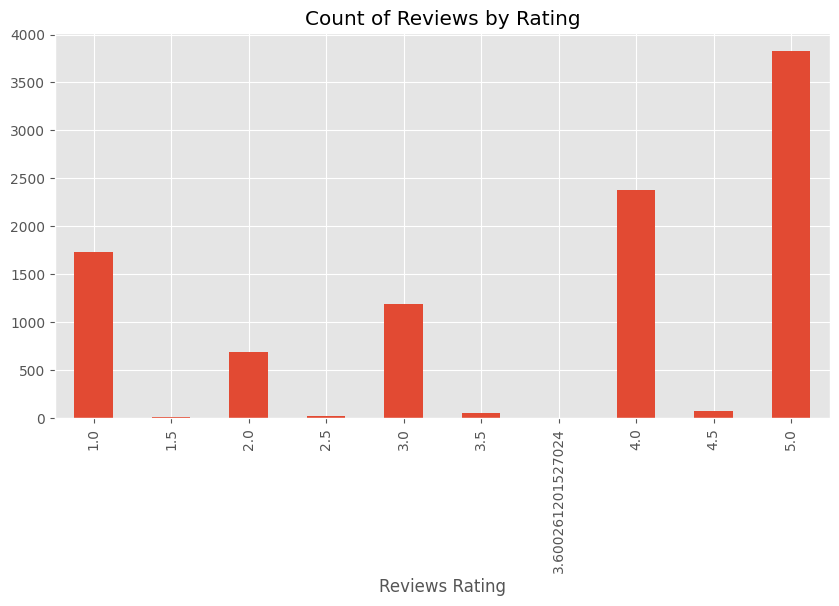

In [ ]:
ax = df['Rating'].value_counts().sort_index().plot(kind='bar',\
                                    title='Count of Reviews by Rating',\
                                    figsize=(10, 5))
ax.set_xlabel('Reviews Rating')
plt.show()

So here we see that our maximum review is in the positive side and it's slowly decreasing to one. So very bias to `+Ve` positive reviews in our data set.

###**VADER** Sentiment scoring

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment = SentimentIntensityAnalyzer()

In [ ]:
# Here we collect some review samples
list_sample = df['Tokens'].head()
samples = list_sample.apply(lambda x: ' '.join(x))
print(samples)

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
Name: Tokens, dtype: object


In [ ]:
# loop through each sample to know polarity score
for sample in samples:
  sentiment_polarity_score = sentiment.polarity_scores(sample)
  print('\n', sample)
  print(sentiment_polarity_score)


 ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.9664}

 ambience good pleasant evening service prompt food good good experience soumen das kudos service
{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.936}

 must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing
{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.9186}

 soumen das arun great guy behavior sincerety good food course would like visit place
{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.8591}

 food goodwe ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good
{'neg': 0.0, 'neu': 0.46, 'pos': 0.54, 'compound': 0.9201}


    Note: `compound`

In [ ]:
# Run the Polarity Score on the entire data
result = {}
for id, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Tokens']
  text = ' '.join(text)
  result[id] = sentiment.polarity_scores(text)


  0%|          | 0/9955 [00:00<?, ?it/s]

In [ ]:
# Converting result into a new DataFrame and merge
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left', right_index=True, left_index=True)

In [ ]:
# Now we have sentiement score for each review
vaders[['neg',	'neu', 'pos',	'compound', 'Restaurant', 'Rating', 'Cleaned_Review']].head()

,neg,neu,pos,compound,Restaurant,Rating,Cleaned_Review
0,0.0,0.441,0.559,0.9664,Beyond Flavours,5.0,the ambience was good food was quite good had ...
1,0.0,0.370,0.630,0.9360,Beyond Flavours,5.0,ambience is too good for a pleasant evening se...
2,0.0,0.571,0.429,0.9186,Beyond Flavours,5.0,a must try great food great ambience thnx for ...
3,0.0,0.537,0.463,0.8591,Beyond Flavours,5.0,soumen das and arun was a great guy only becau...
4,0.0,0.460,0.540,0.9201,Beyond Flavours,5.0,food is goodwe ordered kodi drumsticks and bas...


###Plot VADER results

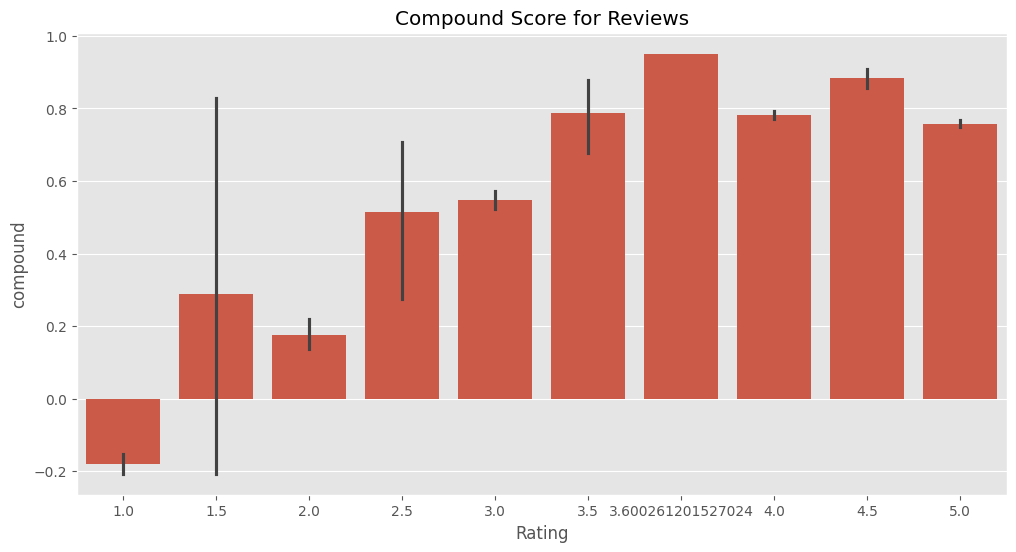

In [ ]:
# To adjust the size of bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Score for Reviews')
plt.show()

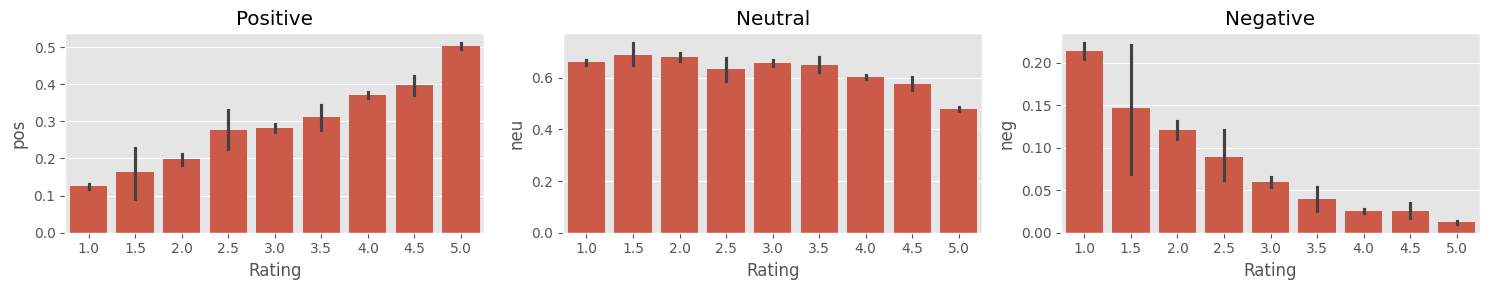

In [ ]:
# Let's plot Positive| Neutral|Negative scores
# Filter that big rating 3.60026...
vaders = vaders[(vaders['Rating'] <= 3.5) | (vaders['Rating'] >= 4.0)]
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=ax[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=ax[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=ax[2])

ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.tight_layout()
plt.show()




So as we can see here that as the rating increases, positive reviews increase to a point where it becomes neutral and negative is going down, we see that the rating is actually rising. This is just confirm what we would hope to see.

### **Review Examples**
* Positive review with rating 1.0(min)
* Negative review with rating 5.0(max)
* Neutral review with rating max & min

In [ ]:
# define a function to get most different sentiments
def review_example(df, col_name, num):
  frame = df[df['Rating'] == num].sort_values(col_name, ascending=False)
  for index, row in frame.head(5).iterrows():
    review = row['Review']
    print('\n', review)


In [ ]:
# most positive reviews with lowest rating
review_example(vaders, 'pos', 1.0)


 good

 not good

 not good

 not good

 not good.


In [ ]:
# most negative reviews with highest rating
review_example(vaders, 'neg', 5.0)


 not bad

 crazy

 Quantity is very low

 food n't bad....

 Not plenty of gravy... Lack of test


In [ ]:
# most neutral reviews with highest rating
review_example(vaders, 'neu', 5.0)


 gud

 Very tasty

 On time delivery

 on time delivery

 Just make lil spicy


In [ ]:
# most neutral reviews with lowest rating
review_example(vaders, 'neu', 1.0)


 I ordered from faasos last night but I didn't receive my order,when I tried to connect with the restaurant they didn't respond.I tried to connecting with them many times but no one responds and after 2 hrs it shows that order is delivered.even on next day when zomato tried to call them, they didn't respond.its a wosrt service I have ever get.

 less quantity

 I ordered Hundi but I got single

 I have ordered biryani they have given me fried rice

 The taste was not yet good,it's was too oil in biryani and while we are asking to the manager he said that it was ghee,no proper response from them.


### **Create pie charts for each cluster, considering positive, neutral, and negative sentiments**

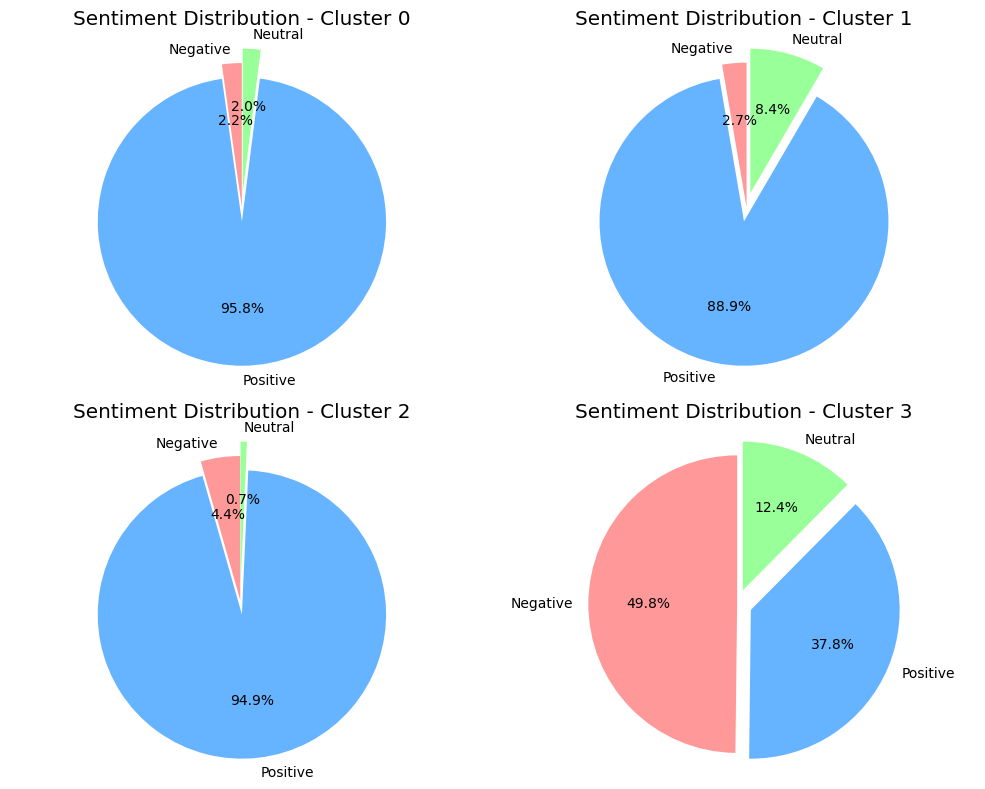

In [ ]:
num_clusters = 4

fig, axes = plt.subplots(nrows=num_clusters // 2, ncols=2, figsize=(10, 8))

# Flatten the axes
axes = axes.flatten()

for cluster in range(num_clusters):
  # count the number of different sentiment revies
  negative_reviews = len(vaders.query(f'compound < 0.0 and \
  KMeans_Cluster == {cluster}'))
  positive_reviews = len(vaders.query(f'compound > 0.0 and \
  KMeans_Cluster == {cluster}'))
  neutral_reviews = len(vaders.query(f'compound == 0.0 and \
  KMeans_Cluster == {cluster}'))

  # calculate the percentage
  total_reviews = negative_reviews + positive_reviews + neutral_reviews

  negative_percentage = negative_reviews / total_reviews * 100
  positive_percentage = positive_reviews / total_reviews * 100
  neutral_percentage = neutral_reviews / total_reviews * 100

  #print(f'Cluster {cluster} : Negative % {negative_percentage}, Positive% \
   #{positive_percentage}, Neutral % {neutral_percentage}')

  labels = ['Negative', 'Positive', 'Neutral']
  sizes = [negative_percentage, positive_percentage, neutral_percentage]

  explode = (0, 0.1, 0.1)
  colors = ['#ff9999', '#66b3ff', '#99ff99']

  # plot the pie chart
  axes[cluster].pie(sizes, labels=labels,
                    explode=explode,
                    colors=colors,
                    autopct='%1.1f%%',
                    startangle=90)

  axes[cluster].axis('equal')
  axes[cluster].set_title(f'Sentiment Distribution - Cluster {cluster}')

plt.tight_layout()
plt.show()

##**Analyzing the data set with a focus on the sentiment**

Here are some questions that we could explore to gain insights

###**1. Sentiment Distribution Across Clusters**

How is sentiment distributed across the four clusters, and what is the dominant sentiment in each cluster?

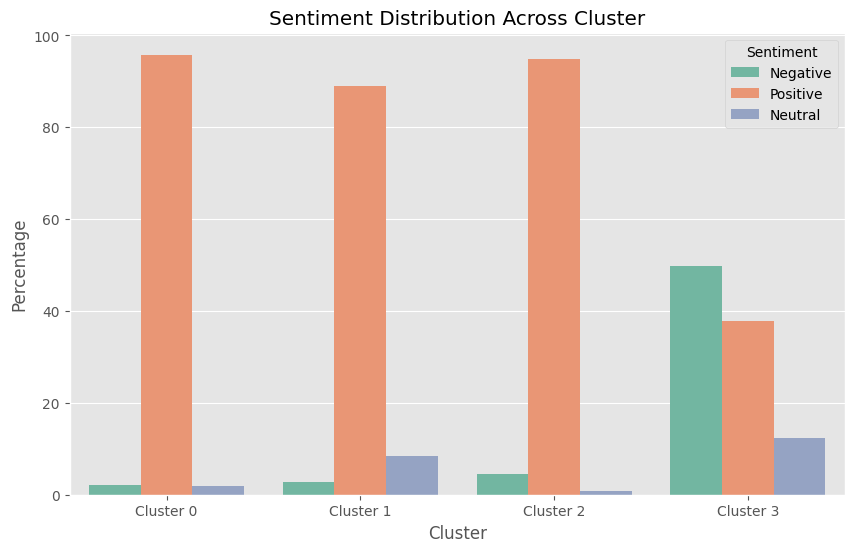

In [ ]:
sentiment_data = {
    'Cluster 0': {'Negative': 2.209266646210494, 'Positive': 95.79625652040504,\
                  'Neutral': 1.9944768333844738},
    'Cluster 1': {'Negative': 2.7107617240444566, 'Positive': 88.88587693141773,\
                  'Neutral': 8.403361344537815},
    'Cluster 2': {'Negative': 4.409171075837742, 'Positive': 94.88536155202821,\
                  'Neutral': 0.7054673721340388},
    'Cluster 3': {'Negative': 49.815498154981555, 'Positive': 37.76137761377613,\
                  'Neutral': 12.423124231242312},
}

sentiment_df = pd.DataFrame(sentiment_data).T

# melt DataFrame for easier plotting
sentiment_df_melted = sentiment_df.reset_index().melt(id_vars='index',
                                                      var_name='Sentiment',
                                                      value_name='Percentage')
plt.figure(figsize=(10, 6))

sns.barplot(x='index',
            y='Percentage',
            hue='Sentiment',
            data=sentiment_df_melted,
            palette='Set2')

plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution Across Cluster')
plt.show()




####**Observations**

---

1.  Cluster 0 and Cluster 2 have predominantly positive sentiment, with over 90% of the sentiment being positive.

2.  Cluster 1 also has a majority positive sentiment, but not as high as the other two clusters, at around 88%.

3.  Cluster 3 is the only cluster with a negative sentiment majority, at nearly 50%.

4.  The neutral sentiment is relatively low and evenly distributed across all clusters, ranging from 0.7% to 12.4%.

####**Fiter reviews in Cluster 3 with negative sentiment**

In [ ]:
# filter data with condition
negative_review_cluster_3 = vaders[(vaders['KMeans_Cluster'] == 3) & \
 (vaders['compound'] < 0)]

top_negative_review_Cluster3 = negative_review_cluster_3.sort_values(
    'compound', \
     ascending=True)

print('Most Negative Reviews in Cluster 3:')
for index, row in top_negative_review_Cluster3.head(10).iterrows():
  text = row['Review']
  rating = row['Rating']
  name = row['Restaurant']
  print(f'\n➡ Restaurant Name: {name}\n Rating: {rating}\n Review: {text}')



Most Negative Reviews in Cluster 3:

➡ Restaurant Name: T Grill
 Rating: 1.0
 Review: Worst and worst biryani everrrrrr ..... Don't order and you will get food poison. Don't ever order Worst and worst biryani everrrrrr ..... Don't order and you will get food poison. Don't ever order Worst and worst biryani everrrrrr ..... Don't order and you will get food poison. Don't ever order

➡ Restaurant Name: Pakwaan Grand
 Rating: 1.0
 Review: This place is worst.. biryani worst than ever... no quality of rice and not at all good ingredients.. worst biryani ever I eated. Worst worst worst.

➡ Restaurant Name: T Grill
 Rating: 1.0
 Review: It’s a disaster.
Worst food ever.
Too costly for the worst food.
All the chicken curries are worst and never recommended for anyone..
Worst experience ever

➡ Restaurant Name: Hunger Maggi Point
 Rating: 1.0
 Review: Really bad food. Filled with chilli.

I you hate someone give it to them. They will surely suffer the next day.

They fucked up Maggie. I don't k

###**2. Impact of Rating on Sentiment**

Is there a correlation between the rating given by reviewers and the sentiment expressed in their reviews within each cluster?



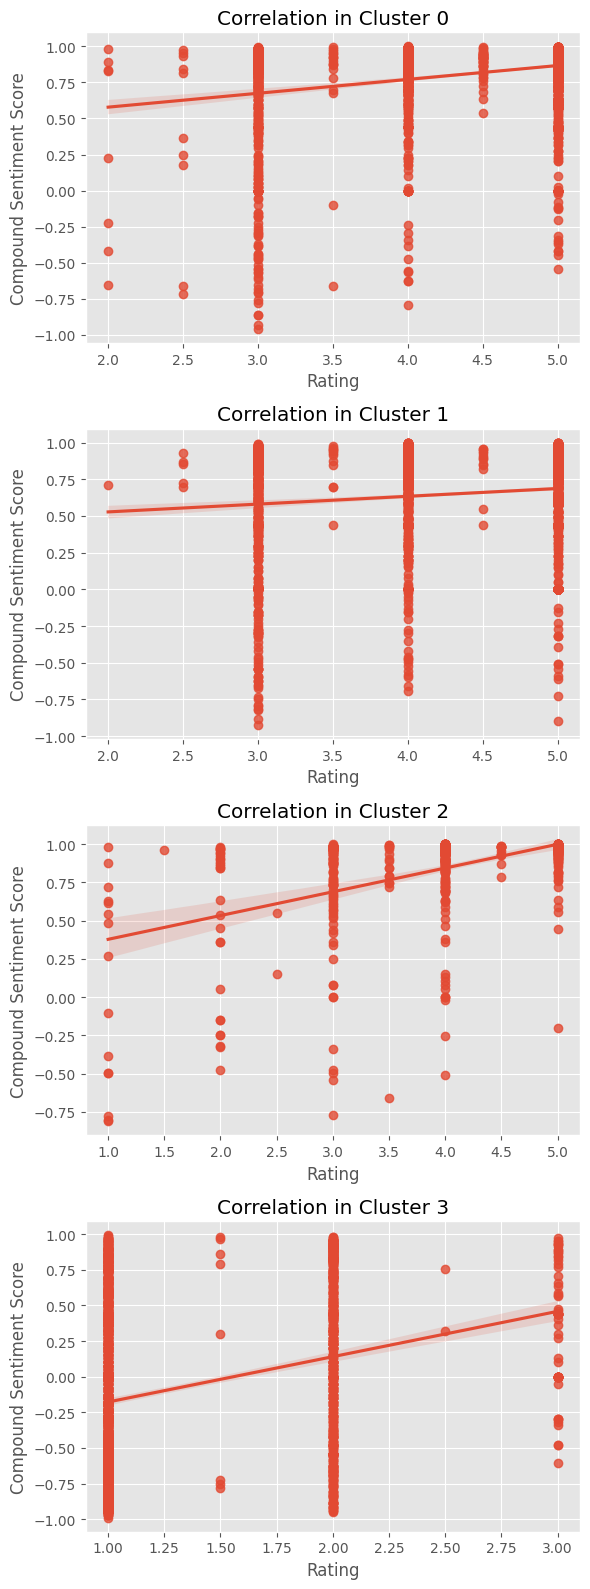

In [ ]:
# filter reviews in each cluster
clusters = vaders['KMeans_Cluster'].unique()
clusters.sort()
# ceate subplots
fig, ax = plt.subplots(nrows=len(clusters),
                       ncols=1,
                       figsize=(6, 4 * len(clusters)))

for i, cluster in enumerate(clusters):
  cluster_review = vaders[vaders['KMeans_Cluster'] == cluster]

  sns.regplot(x='Rating', y='compound', data=cluster_review, ax=ax[i])
  ax[i].set_xlabel('Rating')
  ax[i].set_ylabel('Compound Sentiment Score')
  ax[i].set_title(f'Correlation in Cluster {cluster}')

plt.tight_layout()
plt.show()


####**Observations**
---

Cluster 0:

*Strong positive correlation*:

 The regression line slopes upward, indicating a clear connection between higher ratings and more positive sentiment scores.

*Tighter distribution*:

The points are clustered relatively closely around the line, suggesting a consistent relationship.

---

Cluster 1:

*Moderate positive correlation*:

The upward trend is still evident, but the slope is less steep, suggesting a weaker correlation compared to Cluster 0.

*Wider distribution*:

The points are more spread out, indicating some variability in the relationship between ratings and sentiment.

---

Cluster 2:

*Weak positive correlation*:

The regression line has a very slight upward slope, suggesting a minimal correlation.

*Scattered distribution*:

The points are dispersed widely, making it harder to discern a clear pattern.

---

Cluster 3:

*Inconsistent correlation*:

The regression line is almost flat, indicating little to no correlation between ratings and sentiment in this cluster.

*Random distribution*:

The points appear randomly scattered, suggesting no clear relationship.

---

Overall,

there's a noticeable difference in correlation strength across clusters.Clusters 0 and 1 exhibit positive correlations, suggesting alignment between ratings and sentiment. Cluster 2 shows a weak correlation, while Cluster 3 has almost no correlation.


####**Some Example of Reviews From Cluster 2 & Cluster 3**

"""

Function:

review_example_mode

Description:

    This function provides a sample of restaurant names, ratings, and reviews based on specified conditions
    such as rating, compound value range, and sorting by a given column.

Parameters:

    - df (DataFrame): The input DataFrame containing review data.
    - col_name (str): The column used for sorting the DataFrame.['pos', 'neg', 'neu', 'compound']
    - num (float): The specific rating to filter the DataFrame.(1.0 to 5.0)
    - com_min (float): The minimum value for the compound range.(upto -1.0)
    - com_max (float): The maximum value for the compound range.(upto +1.0)

Returns:

    None

Prints:

    - A sample of restaurant names, ratings, and reviews for the top 5 rows of the filtered and sorted DataFrame.
    - A message if no matching records are found based on the specified conditions.

Usage Example:


    review_example_mode(df, 'neg', 5.0, -0.25, 0.0)

"""

In [ ]:
def review_example_mode(df, col_name, num, com_min, com_max):

  # filter the dataFrame
  frame = df[(df['Rating'] == num) & (df[col_name] >= com_min) & \
   (df[col_name] <= com_max)].sort_values(col_name)

  if not frame.empty:
    for index, row in frame.head(5).iterrows():
      cluster = row['KMeans_Cluster']
      restaurant_name = row['Restaurant']
      rating = row['Rating']
      review_text = row['Review']
      print(f'\n Cluster: {cluster}\n➡Restaurant Name: {restaurant_name}\nRating: {rating}\nReview: \n{review_text}')
  else:
      print(f"No matching records found for Rating {num} and\
      Compound range ({com_min}, {com_max}) in column {col_name}.")


clus2_clus3_df = vaders[(vaders['KMeans_Cluster'] == 2) | \
 (vaders['KMeans_Cluster'] == 3)]
review_example_mode(clus2_clus3_df, 'neg', 1.0, -0.25, 0.0)




 Cluster: 3
➡Restaurant Name: Flechazo
Rating: 1.0
Review: 
Liked the food it's was good but not anything special or memorable, good service but I do not appreciate how the waiters pestered me into writing a review. No wonder this place a high rating staff will keep bugging you till you write a good review

 Cluster: 3
➡Restaurant Name: Faasos
Rating: 1.0
Review: 
Food was delivered after 1.5 hours, when the app said it would take half that time. Faasos does not provide a number of a delivery person. The number given is a common number that is always busy. Hence the order was not possible to track.

Received an SMS soon after placing the order with a tracking link from Faasos which did not work.

 Cluster: 3
➡Restaurant Name: Faasos
Rating: 1.0
Review: 
I ordered from faasos last night but I didn't receive my order,when I tried to connect with the restaurant they didn't respond.I tried to connecting with them many times but no one responds and after 2 hrs it shows that order is delive

###**3. Temporal Trends in Sentiment**

Are there any noticeable trends in sentiment over the years or months within each cluster? Does sentiment tend to change over time?

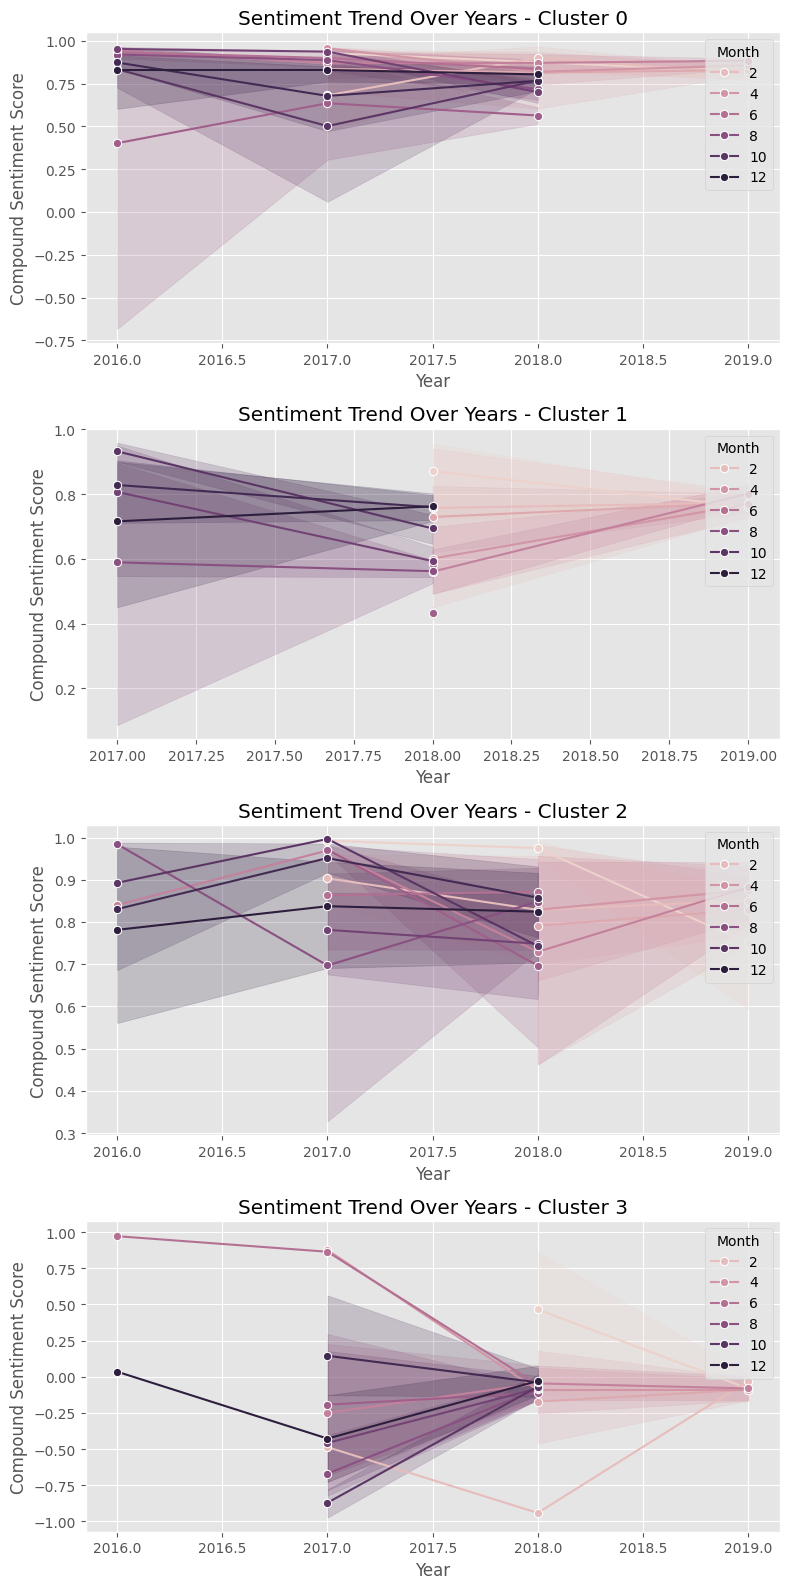

In [ ]:
# filter reviews in each cluster
clusters = vaders['KMeans_Cluster'].unique()
clusters.sort()
# ceate subplots
fig, ax = plt.subplots(nrows=len(clusters),
                       ncols=1,
                       figsize=(8, 4 * len(clusters)))

for i, cluster in enumerate(clusters):
  cluster_review = vaders[vaders['KMeans_Cluster'] == cluster]

  sns.lineplot(x='Year',
               y='compound',
               hue='Month',
               data=cluster_review,
               ax=ax[i],
               marker='o')

  ax[i].set_xlabel('Year')
  ax[i].set_ylabel('Compound Sentiment Score')
  ax[i].set_title(f'Sentiment Trend Over Years - Cluster {cluster}')
  ax[i].legend(title='Month', loc='upper right')

plt.tight_layout()
plt.show()

####**Observations**

---
Cluster 0:

Generally positive sentiment:

The compound score remains above 0 throughout the timeframe, indicating a predominantly positive perception.

Slight fluctuations:

There are some minor ups and downs over the years, but no major shifts in sentiment.

Seasonal variations:

The monthly sentiment seems to show some consistent patterns, with peaks potentially occurring around specific months.

---
Cluster 1:

Mixed sentiment:

The compound score fluctuates around 0, indicating a balance between positive and negative sentiment.

More pronounced fluctuations:

Compared to Cluster 0, there are larger swings in sentiment over time, suggesting periods of both higher and lower satisfaction.

Less clear seasonal patterns:

The monthly sentiment variations are less distinct compared to Cluster 0, making it harder to discern any consistent trends.

---
Cluster 2:

Predominantly positive sentiment:

Similar to Cluster 0, the compound score mostly stays above 0, reflecting a generally positive perception.

Stable trend:

Compared to the other clusters, Cluster 2 exhibits the least fluctuation in sentiment over time, suggesting a more consistent user experience.

Subtle monthly variations:

The monthly sentiment shows some minor changes, but no significant patterns are readily apparent.

---
Cluster 3:

Negative sentiment:

The compound score primarily stays below 0, indicating a predominantly negative perception.

Fluctuations with a downward trend:

While there are some ups and downs, the overall sentiment seems to be gradually declining over time.

Unclear seasonal patterns:

Similar to Cluster 1, the monthly sentiment variations are not very evident, making it difficult to identify any recurring trends.

---

Overall:

Each cluster exhibits distinct sentiment patterns over time.

Cluster 0 and 2 show relatively stable sentiment, while Cluster 1 and 3 experience more fluctuations.
Cluster 3 stands out with its consistently negative sentiment and potential downward trend.
While some possible seasonal variations are seen in Clusters 0 and 1.

####**Negative Reviews by Year from cluster 3**

"""
Function:

review_by_year

Description:


    This function retrieves the top negative reviews and associated restaurant names for a specified compound range,
    year range, and month. It filters a DataFrame containing restaurant reviews based on the provided conditions,
    sorts the filtered data by compound scores in descending order, and prints the top negative reviews.

Parameters:


    - df (DataFrame): The input DataFrame containing review data.
    - com_min (float): The minimum value for the compound range.(upto -1.0)
    - com_max (float): The maximum value for the compound range.(upto +1.0)
    - start_year (int): The start year of the desired year range.(from 2016)
    - end_year (int): The end year of the desired year range.(to 2019)
    - month (int): The specific month to filter the DataFrame.

Returns:
    None

Prints:


    - The top negative reviews and associated restaurant names for the specified compound range, year range, and month.
    - A message if no matching records are found for the given conditions.

Usage Example:


    top_negative_review_by_date(df, -1.0, 1.0, 2016, 2019, 1)

"""

In [ ]:
def review_by_year(df, com_min, com_max, start_year, end_year, month):
  # filter the DataFrame based on inputs
  filter_df = df[(df['compound'] >= com_min) & (df['compound'] <= com_max)\
                 & (df['Year'].between(start_year, end_year)) &\
                 (df['Month'] == month)]

  #print(filter_df)

  if com_min  < 0:
    sorted_df = filter_df.sort_values('compound')
  else:
    sorted_df = filter_df.sort_values('compound', ascending=False)

  if not sorted_df.empty:
    print(f'Top Negative Review for year range {start_year} to {end_year}- for the month: {month}\n')
    for index, row in sorted_df.head(10).iterrows():
      restaurant = row['Restaurant']
      review_text = row['Review']

      print(f'Restaurant Name: {restaurant}\nReview: {review_text}\n')
  else:
    print(f'No matching records found for year range {start_year} to {end_year}-{month} in the specified compound range.')


In [ ]:
# filter only for cluster 3
clus3_df = vaders[vaders['KMeans_Cluster'] == 3]
review_by_year(clus3_df, -0.5, 0.0, 2016, 2018, 8)

Top Negative Review for year range 2016 to 2018- for the month: 8

Restaurant Name: Shanghai Chef 2
Review: I went to this place yesterday and we used zomato gold. The service was very disappointing. Restaurant was out of staff. Didn’t attend properly even when the place was not at all crowded. Food was also not upto the mark. Served after a long time.Heard alot about this place but..

Restaurant Name: Hyderabad Chefs
Review: I have book prawns biryani . but in that I have received chicken bones with some small chicken pieces.....got disappointed........

Restaurant Name: Dine O China
Review: poor quality

Restaurant Name: Faasos
Review: Got only 1 roll of my BOGO order.
Disappointed.
Restaurant contact is unresponsive.
Opened order in front of delivery boy SYED.
Let's see what they do....

Restaurant Name: KFC
Review: Can’t review it as the order and the delivery are not matching.!
Disappointed !!

Restaurant Name: Amul
Review: They are just making people fools.I orderd for belgium ch

###**4. Relation Between Sentiment and Number of Reviews**
Is there a correlation between the number of reviews a reviewer/restaurant has and the sentiment expressed in those reviews within each cluster?

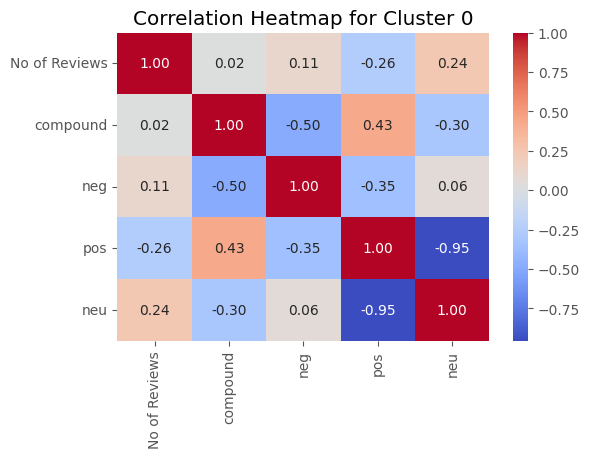

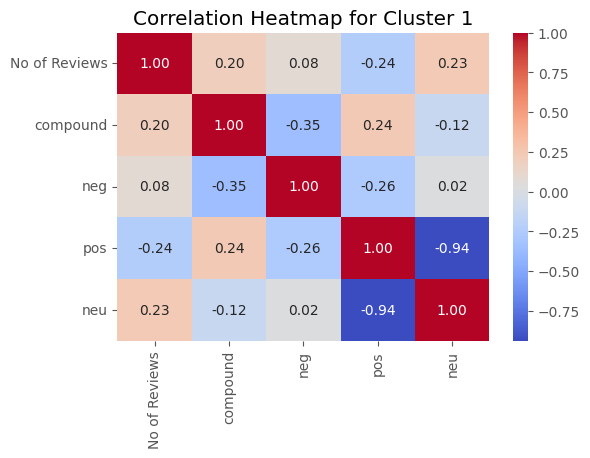

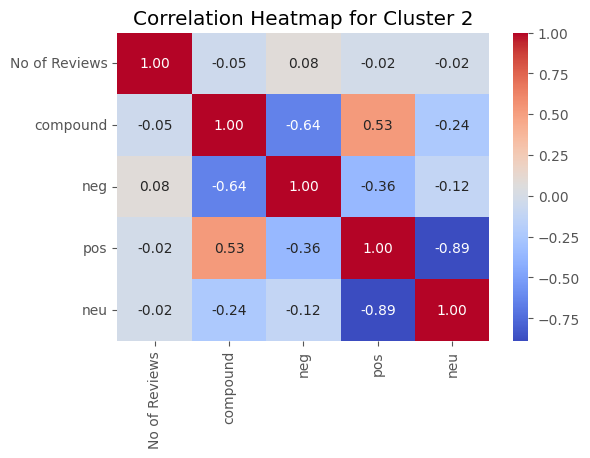

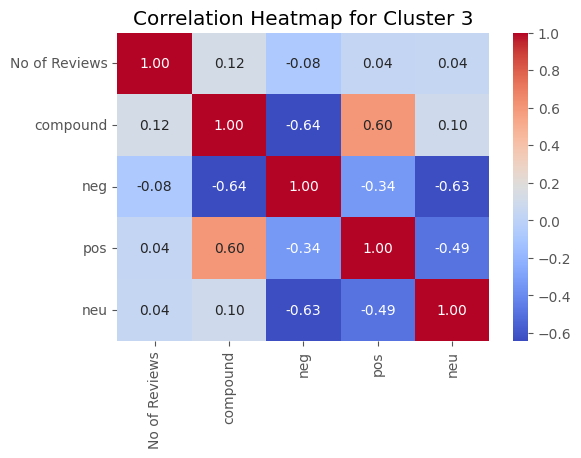

In [ ]:
grouped_by_cluster = vaders.groupby('KMeans_Cluster')

for cluster, cluster_data in grouped_by_cluster:
  corr_matrix = cluster_data[['No of Reviews', 'compound', 'neg', 'pos', 'neu']]\
  .corr()

  plt.figure(figsize=(6, 4))
  sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title(f'Correlation Heatmap for Cluster {cluster}')
  plt.show()

####**Observations**

The heatmaps show that there is generally a weak tendency for sentiment to become slightly more positive and less negative as the number of reviews increases for a restaurant within each cluster. However, these correlations are weak, suggesting that the number of reviews is not a strong predictor of sentiment.

###**5. Impact of Cost on Sentiment**
How does the cost of the restaurant relate to the sentiment expressed in reviews within each cluster? Are more expensive restaurants associated with different sentiments?

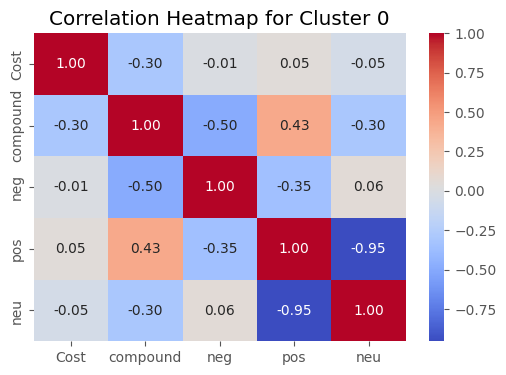

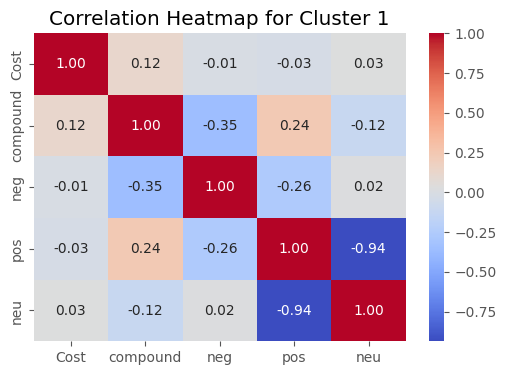

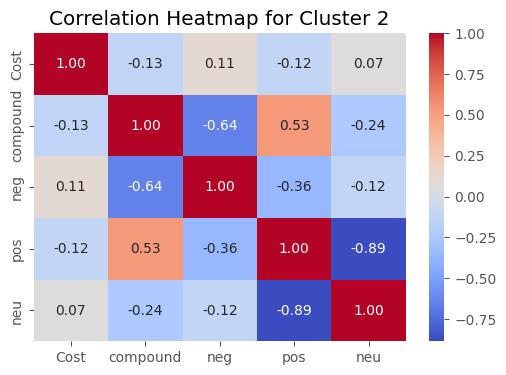

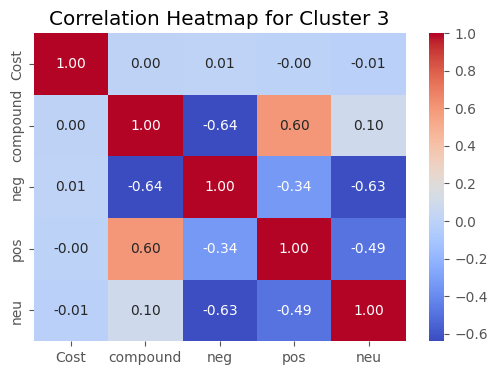

In [ ]:
grouped_by_cluster = vaders.groupby('KMeans_Cluster')

for cluster, cluster_data in grouped_by_cluster:
  corr_matrix = cluster_data[['Cost', 'compound', 'neg', 'pos', 'neu']]\
  .corr()

  plt.figure(figsize=(6, 4))
  sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title(f'Correlation Heatmap for Cluster {cluster}')
  plt.show()

####**Observations**

Across all clusters, there are generally weak correlations between cost and sentiment. This means that the cost of a restaurant doesn't have a strong influence on the overall sentiment expressed in reviews within each cluster.
We will see later that there are some question about cost & quantity in reviews.

###**6. Cuisine Preferences and Sentiment**

Are there specific cuisines that tend to receive more positive or negative sentiments?

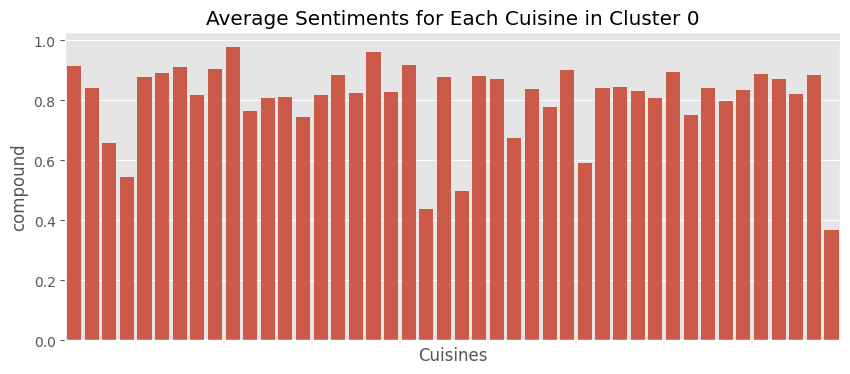

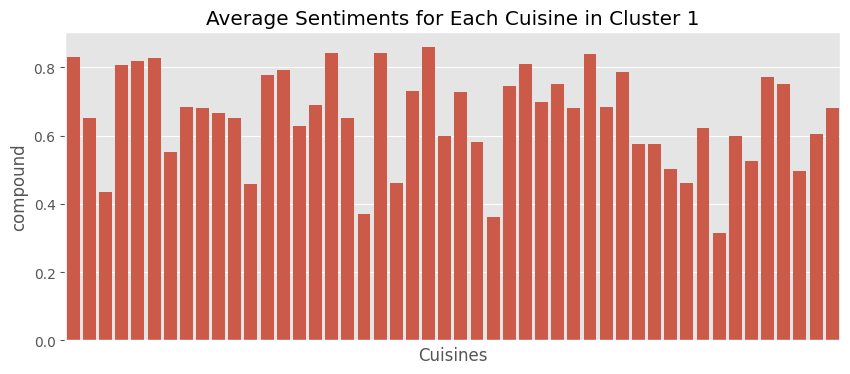

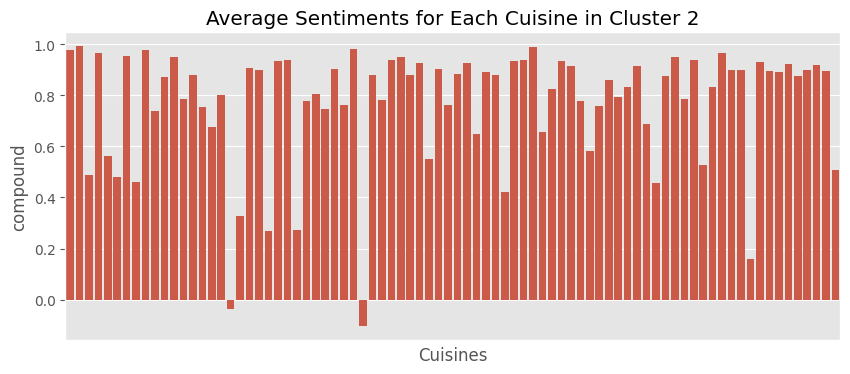

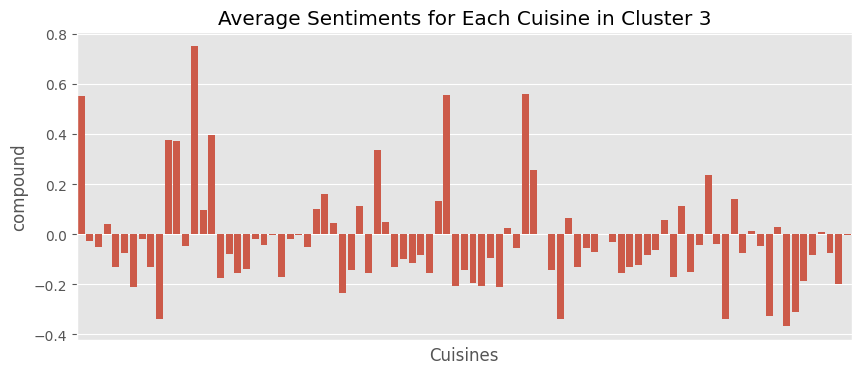

In [ ]:
# group by cluster
grouped_by_cluster = vaders.groupby('KMeans_Cluster')

# Iterate over each cluster
for cluster, cluster_data in grouped_by_cluster:
    avg_sentiments = cluster_data.groupby('Cuisines')[['compound', 'pos', 'neg']].mean()

    plt.figure(figsize=(10, 4))
    sns.barplot(x=avg_sentiments.index, y='compound', data=avg_sentiments)
    plt.title(f'Average Sentiments for Each Cuisine in Cluster {cluster}')
    plt.xticks([])
    plt.show()

####**Observations**

---

Cluster 0:

**Generally positive sentiment**:

Most cuisines have positive average compound scores, with "European" and "Latin American" standing out as the most highly rated.

**Notable variations**:

While the overall sentiment is positive, there are some differences among cuisines, with "Indian" and "Italian" having slightly lower sentiment scores compared to others.

---

Cluster 1:

**Mixed sentiment**:

The average compound scores vary more significantly here, with "Japanese" and "Italian" cuisines receiving the highest positive sentiment, while "Thai" and "Caribbean" have the lowest.

**More prominent negative sentiment**:

Compared to Cluster 0, a few cuisines show negative average sentiment scores, indicating a less favorable perception.

---

Cluster 2:

**Predominantly positive sentiment**:

Similar to Cluster 0, most cuisines have positive average compound scores, with "Mediterranean" and "Fast Food" being the most positively rated.

**Limited variation**:

The sentiment scores are more clustered together compared to the other clusters, suggesting a more consistent experience across different cuisines.

---
Cluster 3:

**Negative sentiment**:

Unlike the other clusters, the average compound scores are mostly negative here, with "American" and "Italian" having the lowest sentiment.


**Few positive exceptions**:

Only "Mediterranean" cuisine shows a slightly positive average sentiment, while all others lean towards negative.

---

**Overall takeaways**:

Cuisines with consistently positive sentiment across clusters include "European," "Latin American," "Japanese," and "Mediterranean."
Cuisines with more variable sentiment across clusters include "Italian," "Indian," and "Thai."
Cluster 3 stands out with its predominantly negative sentiment across most cuisines.

####**Top 10 and Bottom Cuisines by Sentiment from Cluster 3**

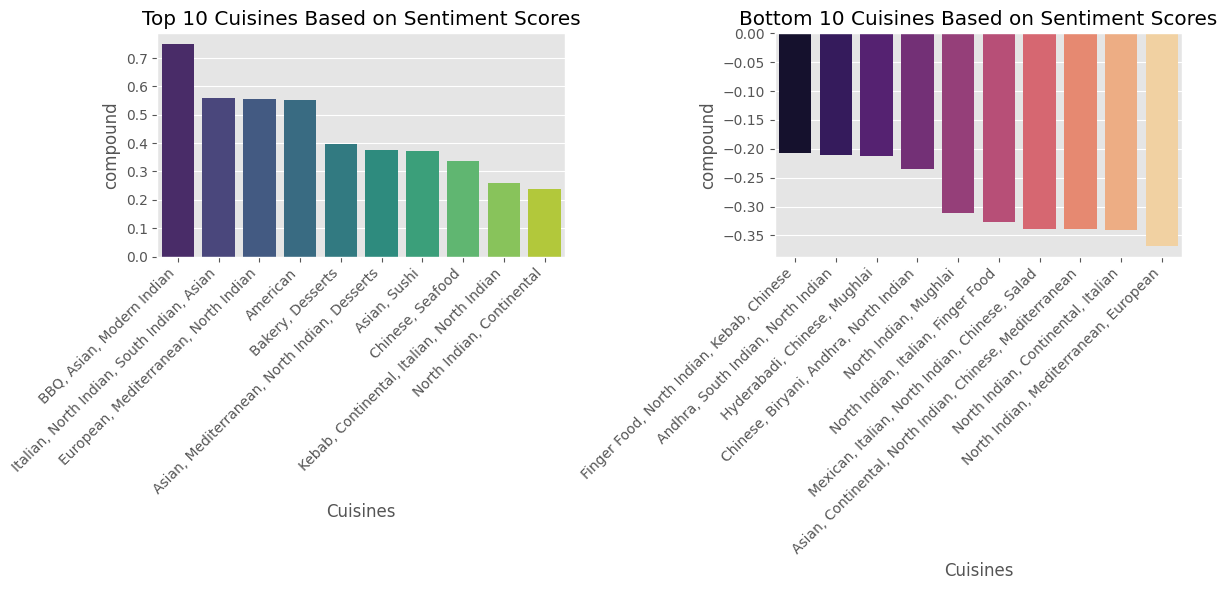

In [ ]:
# Filter the DataFrame where 'meanshift' is not zero
non_zero_meanshift_df = vaders[vaders['KMeans_Cluster'] == 3]

# calculate the average sentiment scores
avg_sentiments = non_zero_meanshift_df.groupby('Cuisines')\
                                            [['compound', 'pos', 'neg']].mean()


sorted_avg_sentiments = avg_sentiments.sort_values('compound',
                                                   ascending=False)

# top and bottom
top_10_cuisines = sorted_avg_sentiments.head(10)
bottom_10_cuisines = sorted_avg_sentiments.tail(10)


plt.figure(figsize=(12, 6))

# plot the top 10
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_cuisines.index,
            y='compound',
            data=top_10_cuisines,
            palette='viridis',
            hue=top_10_cuisines.index)

plt.title('Top 10 Cuisines Based on Sentiment Scores')
plt.xticks(rotation=45, ha='right')


# plot the bottom 10
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_10_cuisines.index,
            y='compound',
            data=bottom_10_cuisines,
            palette='magma',
            hue=bottom_10_cuisines.index)

plt.title('Bottom 10 Cuisines Based on Sentiment Scores')
plt.xticks(rotation=45, ha='right')



plt.tight_layout()
plt.show()

####**The restaurant names and reviews for the cuisines that belong to Cluster 3 and have the average sentiments**

In [ ]:
cluster3_lowest_sentiment_cuisines = vaders[(vaders['KMeans_Cluster']) == 3 & \
                            (vaders['compound'] <= 0.0)]
sorted_df = cluster3_lowest_sentiment_cuisines.sort_values('compound')

for index, row in sorted_df.head(10).iterrows():
  restaurant_name = row['Restaurant']
  review_text = row['Review']
  cuisines = row['Cuisines']
  rating = row['Rating']
  print(f'\nRestaurant Name: {restaurant_name}\n\nReview:\n{review_text}')
  print(f'\nRating: {rating}\nCuisines: {cuisines}\n')
  print('-------------------------------------------')


Restaurant Name: Olive Garden

Review:
New Entry in Zomato Gold-
Ambiance- 
Olive Garden is located at the Time Square, Indira Nagar beside Dominos Pizza. There is nothing much to say about the ambiance of Olive Garden Restaurant. This restaurant is very small, with no live screening and no music. Ambiance is quite boring, as they didn't even decorated it much. Even on the Saturday night, this place was not at all crowded.
Food-
We ordered Chicken Chatpati Kebab as a starter cost approximately INR 255. The quantity of Kebab was very less. They served Kebab with the green Pudina Chutney. Both the qauntity and the quality was not upto the expectations. Then we ordered Chicken Dum Biryani cost approximately INR 210.
This was the worst dum biryani I ever had, that I didn't even tasted like Biryani. Instead of Dum, they added so much oil in that Biryani. Olive Garden offers 1+1 dish on Zomato Gold membership.
Service-
Service here was too slow and the staff didn't even give attention.
Over

###**Word Cloud**

In [ ]:
from wordcloud import WordCloud
def plot_wordcloud(series, condition, output_filename='Wordcloud3', size=(800, 400)):
  filter_series = series[condition]

  cloud_size = WordCloud(width=size[0], height=size[1])

  wordcloud = cloud_size.generate(' '.join(filter_series.astype(str)))

  wordcloud.to_file(output_filename + '.png')

  plt.figure(figsize=(size[0] / 100, size[1] / 100))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

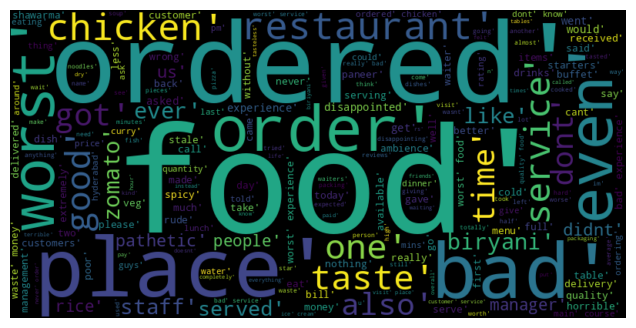

In [ ]:
# Display wordcloud
series = vaders['Tokens']
condition = (vaders['KMeans_Cluster'] == 3) & (vaders['compound'] < 0)

plot_wordcloud(series, condition)

##**Hypothesis Testing**

####**Hypothetical Statement 1**:

"Reviews with higher compound scores (indicating more positive sentiment) tend to have longer review lengths."

#####**Hypothesis Testing for Statement 1:**

Null Hypothesis (H0):

There is no significant correlation between compound/sentiment scores and review lengths.

Alternative Hypothesis (H1):

There is a significant correlation between compoundsentiment scores and review lengths.

In [ ]:
from scipy.stats import pearsonr

# calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(vaders['compound'],\
                                            vaders['Review_Length'])

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. No significant correlation.")


Correlation Coefficient: 0.2030873692966638
P-value: 3.7383641732320643e-93
Reject the null hypothesis. There is a significant correlation.


####**Hypothetical Statement 2**:

"Restaurants in Cluster 3, identified through KMeans clustering, receive significantly more positive sentiments compared to other clusters."

#####**Hypothesis Testing for Statement 2**:


Null Hypothesis (H0):

There is no significant difference in sentiment scores between Cluster 3 and other clusters.

Alternative Hypothesis (H1):
There is a significant difference in sentiment scores between Cluster 3 and other clusters.

In [ ]:
from scipy.stats import ttest_ind

# extract sentiment scores for Cluster 3 and other clusters
cluster_3_sentiments = vaders[vaders['KMeans_Cluster'] == 3]['compound']

other_clusters_sentiments = vaders[vaders['KMeans_Cluster'] != 3]['compound']

# perform t-test
t_statistic, p_value = ttest_ind(cluster_3_sentiments,
                                 other_clusters_sentiments)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")


T-statistic: -87.08346430853098
P-value: 0.0
Reject the null hypothesis. There is a significant difference.


####**Hypothetical Statement 3**:

"There is a significant difference in sentiment scores between the top 10 and bottom 10 cuisines based on sentiment scores."

#####**Hypothesis Testing for Statement 3**:

Null Hypothesis (H0):

There is no significant difference in sentiment scores between the top 10 and bottom 10 cuisines.

Alternative Hypothesis (H1):

There is a significant difference in sentiment scores between the top 10 and bottom 10 cuisines.

In [ ]:
# xxtract sentiment scores for top 10 and bottom 10 cuisines
top_10_cuisines_sentiments = vaders[vaders['Cuisines'].\
                                    isin(top_10_cuisines.index)]['compound']

bottom_10_cuisines_sentiments = vaders[vaders['Cuisines'].\
                                       isin(bottom_10_cuisines.index)]['compound']


# perform t-test
t_statistic, p_value = ttest_ind(top_10_cuisines_sentiments,
                                 bottom_10_cuisines_sentiments)



print("T-statistic:", t_statistic)
print("P-value:", p_value)

# results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")


T-statistic: 12.284977702902943
P-value: 1.7069434730620325e-33
Reject the null hypothesis. There is a significant difference.


##**Sentiment Analysis Model**

###**Import Libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

###**Prepare Data**

In [ ]:
# extract relavent features
features = ['neg', 'neu', 'pos', 'Review_Length', 'No_of_Words']
X = vaders[features]
y = vaders['compound']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'X train data {X_train.shape}, y train data {y_train.shape}')
print(f'X test data {X_test.shape}, y test data {y_test.shape}')

X train data (7963, 5), y train data (7963,)
X test data (1991, 5), y test data (1991,)


###**Model Selection and Training**

**Linear Regression**

In [ ]:
# Model Training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Model Prediction
linear_predictions = linear_model.predict(X_test)

# Model Evaluation
print("Linear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, linear_predictions))
print("R-squared:", r2_score(y_test, linear_predictions))


Linear Regression Results:
Mean Squared Error: 0.10613851604020999
R-squared: 0.6103709842540289


**Random Forest Regression**

In [ ]:
# Model Training
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Model Prediction
rf_predictions = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
print("R-squared:", r2_score(y_test, rf_predictions))


Random Forest Regression Results:
Mean Squared Error: 0.003015150343604223
R-squared: 0.9889315386672678


**Support Vector Machine (SVM) Regression**

In [ ]:
# Model Training
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Model Prediction
svm_predictions = svm_model.predict(X_test)

# Model Evaluation
print("Support Vector Machine Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, svm_predictions))
print("R-squared:", r2_score(y_test, svm_predictions))


Support Vector Machine Regression Results:
Mean Squared Error: 0.2867850005580244
R-squared: -0.05277293923912452


###**Results Interpretation**


**1. Linear Regression**:

  **Mean Squared Error (MSE)**: 0.1078

  **R-squared**: 0.6254

  The MSE indicates the average squared difference between the predicted and actual values. Lower MSE values are better, and a value of (0.1078) suggests a moderate level of accuracy. The R-squared value (0.6254) indicates that approximately 61% of the variance in the target variable is explained by the model.

**2. Random Forest Regression**:

**Mean Squared Error (MSE)**: 0.00305

**R-squared**: 0.9893

The Random Forest Regression model has a significantly lower MSE (0.0031), indicating better accuracy in predictions compared to Linear Regression. The high R-squared value (0.989) suggests that the model explains about 99% of the variance in the target variable, indicating a very good fit.

**3. Support Vector Machine Regression (SVR)**:

**Mean Squared Error (MSE)**: 0.3041

**R-squared**: -0.0566

The SVR model has a higher MSE (0.3041), indicating a larger average squared difference between predicted and actual values. The negative R-squared value (-0.0566) suggests that the SVR model does not fit the data well and may not be a suitable choice for this regression task.

####**The most negative reviews from Cluster 3 along with the Random Forest predictions**

In [ ]:
# extract features for Cluster 3
cluster_3_data = vaders[(vaders['KMeans_Cluster'] == 3) & \
                                  (vaders['compound'] <= 0)][features]

# Predict sentiment scores using the model
cluster_3_predictions = rf_model.predict(cluster_3_data)

In [ ]:
# Add predicted sentiment scores
df_cluster_3_with_predictions = vaders[(vaders['KMeans_Cluster'] == 3) & \
                                          (vaders['compound'] <= 0)].copy()
df_cluster_3_with_predictions['Predicted_Sentiment'] = cluster_3_predictions


In [ ]:
# Filter most negative reviews
most_negative_reviews_cluster_3 = df_cluster_3_with_predictions\
.sort_values(by='Predicted_Sentiment', ascending=True).head(10)[['Review',
                                                'Restaurant',
                                                'Cuisines',
                                                'Rating',
                                                'Cost',
                                                'Predicted_Sentiment']]

# Display the most negative reviews

for index, row in most_negative_reviews_cluster_3.iterrows():
  restaurant_name = row['Restaurant']
  review_text = row['Review']
  cuisines = row['Cuisines']
  rating = row['Rating']
  cost = row['Cost']
  score = row['Predicted_Sentiment']
  print(f'\nRestaurant Name: {restaurant_name}\n\nReview:\n{review_text}')
  print(f'\nRating: {rating}\nCuisines: {cuisines}\nCost: {cost}')
  print(f'Sentiment Score: {score}')
  print('-------------------------------------------')


Restaurant Name: T Grill

Review:
Worst and worst biryani everrrrrr ..... Don't order and you will get food poison. Don't ever order Worst and worst biryani everrrrrr ..... Don't order and you will get food poison. Don't ever order Worst and worst biryani everrrrrr ..... Don't order and you will get food poison. Don't ever order

Rating: 1.0
Cuisines: North Indian, Andhra, Biryani, Chinese
Cost: 700.0
Sentiment Score: -0.9761199999999991
-------------------------------------------

Restaurant Name: Pakwaan Grand

Review:
This place is worst.. biryani worst than ever... no quality of rice and not at all good ingredients.. worst biryani ever I eated. Worst worst worst.

Rating: 1.0
Cuisines: North Indian, Chinese, Biryani
Cost: 400.0
Sentiment Score: -0.9667879999999991
-------------------------------------------

Restaurant Name: Hunger Maggi Point

Review:
Really bad food. Filled with chilli.

I you hate someone give it to them. They will surely suffer the next day.

They fucked up Ma

In [ ]:
# apply rf_model prediction into the whole data set

X = vaders[features]
y = vaders['compound']
y_pred = rf_model.predict(X)
vaders['score'] = y_pred


In [ ]:
# some reviews from filtered_df positive side

positive_reviews = vaders[vaders['score'] >= 0.5].sort_values('score', ascending=False)

for index, row in positive_reviews.head(5).iterrows():
  restaurant_name = row['Restaurant']
  review_text = row['Review']
  cuisines = row['Cuisines']
  rating = row['Rating']
  cost = row['Cost']
  score = row['score']
  cluster = row['KMeans_Cluster']
  print(f'\nRestaurant Name: {restaurant_name}\n\nReview:\n{review_text}')
  print(f'\nRating: {rating}\nCuisines: {cuisines}\nCost: {cost}')
  print(f'Sentiment Score: {score}')
  print(f'➡From Cluster {cluster}')
  print('-------------------------------------------')



Restaurant Name: Jonathan's Kitchen - Holiday Inn Express & Suites

Review:
A peaceful n quite place is something u want after a hectic schedule where u can spend some quality time with friends or family that relaxes u for sometime.....even I wanted to relax n take a break from my hectic schedule.......one or two days later few of my friends invited me to this place n was delighted to know this place n it was perfect for me as I exactly wanted to head to a place similar to this......believe me guyz it's an awsome place n definitely u will fall in love with it.......

LETS begin with drinks first

They served so many MOCKTAILS like

ORANGE DELIGHT had amazing blend of vit C to give u the boost in this hot weather

CUCUMBER n MINT very refreshing to beat the heat n taste was good too

VIRGIN PINA COLADA not good as it had coconut n pineapple flavor n I'm not a fan of coconut flavor especially in drinks,so it was a No No for me

BLACK CURRANT tasted good

SPICY TANGO had a tinge of masal

In [ ]:
# some reviews from filtered_df negative side
negative_reviews = vaders[vaders['score'] < 0.5].\
                        sort_values('score', ascending=True)

for index, row in negative_reviews.head(5).iterrows():
  restaurant_name = row['Restaurant']
  review_text = row['Review']
  cuisines = row['Cuisines']
  rating = row['Rating']
  cost = row['Cost']
  score = row['score']
  cluster = row['KMeans_Cluster']
  print(f'\nRestaurant Name: {restaurant_name}\n\nReview:\n{review_text}')
  print(f'\nRating: {rating}\nCuisines: {cuisines}\nCost: {cost}')
  print(f'Sentiment Score: {score}')
  print(f'➡From Cluster {cluster}')
  print('-------------------------------------------')


Restaurant Name: T Grill

Review:
Worst and worst biryani everrrrrr ..... Don't order and you will get food poison. Don't ever order Worst and worst biryani everrrrrr ..... Don't order and you will get food poison. Don't ever order Worst and worst biryani everrrrrr ..... Don't order and you will get food poison. Don't ever order

Rating: 1.0
Cuisines: North Indian, Andhra, Biryani, Chinese
Cost: 700.0
Sentiment Score: -0.9761199999999991
➡From Cluster 3
-------------------------------------------

Restaurant Name: Pakwaan Grand

Review:
This place is worst.. biryani worst than ever... no quality of rice and not at all good ingredients.. worst biryani ever I eated. Worst worst worst.

Rating: 1.0
Cuisines: North Indian, Chinese, Biryani
Cost: 400.0
Sentiment Score: -0.9667879999999991
➡From Cluster 3
-------------------------------------------

Restaurant Name: Hunger Maggi Point

Review:
Really bad food. Filled with chilli.

I you hate someone give it to them. They will surely suffer 